<a href="https://colab.research.google.com/github/Shaunak-Mukherjee/ECE-58000-Optimization-Methods-for-Systems-And-Control/blob/Optimization-Algorithms/BFGS_Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1: alpha = 0.08337, x_iter = [-0.06581992  0.06525486], f(x_iter) = 3.07983
Iteration 2: alpha = 3.21346, x_iter = [ 0.63929119 -0.66064352], f(x_iter) = -0.51253
Iteration 3: alpha = 0.03335, x_iter = [ 0.64111408 -0.66176089], f(x_iter) = -0.51260
Iteration 4: alpha = 0.30555, x_iter = [ 0.65040326 -0.65040856], f(x_iter) = -0.51391
Iteration 1: alpha = 0.08431, x_iter = [-0.28827507  0.30461725], f(x_iter) = 2.66270
Iteration 2: alpha = 0.15627, x_iter = [-0.5461753   0.60409984], f(x_iter) = 1.94162
Iteration 3: alpha = 1.00000, x_iter = [-0.5473598  0.5484306], f(x_iter) = 1.93534
Iteration 4: alpha = 1.00000, x_iter = [-0.57719271  0.56266031], f(x_iter) = 1.93078
Iteration 5: alpha = 1.00000, x_iter = [-0.56439204  0.56654772], f(x_iter) = 1.92978
Iteration 6: alpha = 1.00000, x_iter = [-0.56544047  0.56532942], f(x_iter) = 1.92977


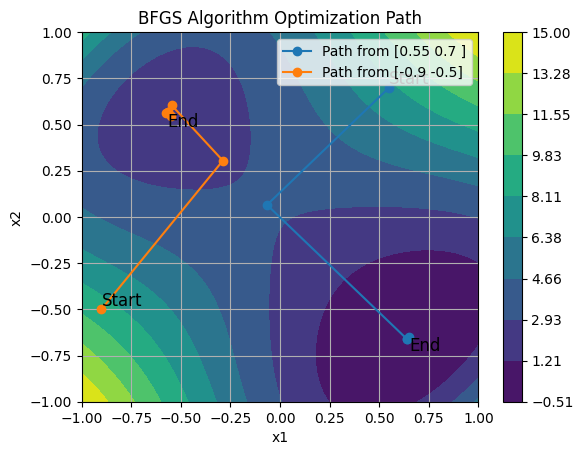

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import line_search

# Define the function and its gradient
def f(x):
    x1, x2 = x
    return (x2 - x1)**4 + 12*x1*x2 - x1 + x2 + 3

def grad(x):
    x1, x2 = x
    df_dx1 = -4*(x2 - x1)**3 + 12*x2 - 1
    df_dx2 = 4*(x2 - x1)**3 + 12*x1 + 1
    return np.array([df_dx1, df_dx2])

# BFGS algorithm
def bfgs(x0, tol=1e-2, max_iter=100):
    x = x0
    Hk = np.eye(2)
    iteration = 0
    x_history = [x]

    while np.linalg.norm(grad(x)) > tol and iteration < max_iter:
        d = -Hk @ grad(x)
        alpha = line_search(f, grad, x, d)[0]
        if alpha is None:
            alpha = 1.0

        x_new = x + alpha * d
        s = x_new - x
        y = grad(x_new) - grad(x)
        rho = 1.0 / (y @ s)

        Hk = (np.eye(2) - rho * np.outer(s, y)) @ Hk @ (np.eye(2) - rho * np.outer(y, s)) + rho * np.outer(s, s)

        x_history.append(x_new)
        x = x_new
        iteration += 1
        print(f'Iteration {iteration}: alpha = {alpha:.5f}, x_iter = {x_new}, f(x_iter) = {f(x_new):.5f}')
    return x, x_history

# Plotting the function and optimization path
x1_range = np.linspace(-1, 1, 100)
x2_range = np.linspace(-1, 1, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
f_values = (x2_grid - x1_grid)**4 + 12*x1_grid*x2_grid - x1_grid + x2_grid + 3

plt.figure()
cp = plt.contourf(x1_grid, x2_grid, f_values, levels=np.linspace(f_values.min(), f_values.max(), 10), cmap='viridis')
plt.colorbar(cp)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('BFGS Algorithm Optimization Path')

# Initial points
initial_guesses = np.array([[0.55, 0.7], [-0.9, -0.5]])
for x0 in initial_guesses:
    x_opt, x_history = bfgs(x0)
    x_history = np.array(x_history)
    plt.plot(x_history[:, 0], x_history[:, 1], marker='o', label=f'Path from {x0}')
    plt.text(x_history[0, 0], x_history[0, 1], 'Start', fontsize=12, verticalalignment='bottom')
    plt.text(x_history[-1, 0], x_history[-1, 1], 'End', fontsize=12, verticalalignment='top')

plt.legend()
plt.grid(True)
plt.show()
